In [1]:
import os
import sys
import json
import subprocess
import numpy as np
import fnmatch
import glob
import re
import xml.etree.ElementTree as ET

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Input your job and raw data paths here, and what output directory you want the graphs to go to

job = '/path/to/CryoSPARC/project/JXX'
rawdatapath = '/path/to/raw/data/symlinks'
output_dir = '/path/to/CryoSPARC/project/particle_stats'

In [3]:
# Just run these, nothing to change, will create input files / folders

job_number = job.split('J')[-1]
folder_name = f"particle_stats_J{job_number}"
os.makedirs(f"{output_dir}/{folder_name}/inputs", exist_ok=True)
os.makedirs(f"{output_dir}/{folder_name}/particles_vs_transmission_gridsquares", exist_ok=True)
os.makedirs(f"{output_dir}/{folder_name}/output_CSVs", exist_ok=True)
subprocess.run(["cs2star", "-f", job, f"{output_dir}/{folder_name}/inputs"])

Loading particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:0086m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Loading particle data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:0086m━━━━━━━━━━━━━━━━━━━━━━━━━━━���━━━━━━━━             
Loading micrograph data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loa

Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...    

Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━��━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...   

Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...    

Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...    

Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading micrograph data...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━             
Cleaning up particle data...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Cleaning up micrograph data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Loading particle data...    

CompletedProcess(args=['cs2star', '-f', '/nfs/lcemdata/fischer/tlevitz/CS-20250722-tundra-hexfoiltests-tl/J36', '/nfs/lcemdata/fischer/tlevitz/CS-20250722-tundra-hexfoiltests-tl/particle_stats/particle_stats_J36/inputs'], returncode=0)

In [4]:
# Create the NumPy array; you should not have to change anything here, just run the whole cell 

first_symlink = next(os.scandir(rawdatapath)).path
truerawdatapath = os.path.realpath(first_symlink).split("GridSquare")[0]

# Get all micrograph paths and filter out .xml files
micrograph_paths = [
    path for path in glob.glob(f"{truerawdatapath}/*/Data/FoilHole*Fractions*")
    if not path.endswith(".xml")
        ]

# Function to extract the timestamp from the micrograph name
def extract_timestamp(path):
    match = re.search(r"FoilHole_.*_Data_.*_.*_(\d{8}_\d{6})_Fractions", path)
    if match:
        return match.group(1)  # Return the timestamp (YYYYMMDD_HHMMSS)
    return None

# Sort micrograph paths by timestamp
micrograph_paths = sorted(
    micrograph_paths,
    key=lambda path: extract_timestamp(path)  # Sort by extracted timestamp
)

# Extract grid squares and group micrographs by grid square
grid_square_to_micrographs = {}
for path in micrograph_paths:
    # Extract grid square (GridSquare_*)
    gridsquare = path.split("Images-Disc1/")[1].split("/Data/")[0]
    grid_square_to_micrographs.setdefault(gridsquare, []).append(path)

# Assign grid square indices based on the sorted order of timestamps
sorted_grid_squares = list(grid_square_to_micrographs.keys())
grid_square_map = {gridsquare: i + 1 for i, gridsquare in enumerate(sorted_grid_squares)}

# Extract micrograph names and grid squares
micrographs, gridsquares = zip(*[
    (os.path.splitext(path.split("Data/")[1])[0], path.split("Images-Disc1/")[1].split("/Data/")[0])
    for path in micrograph_paths
])

# Initialize the NumPy array
num_micrographs = len(micrographs)
data = np.zeros((num_micrographs, 7), dtype=object)

# Populate the array
for i, (micrograph, gridsquare) in enumerate(zip(micrographs, gridsquares)):
    data[i] = [micrograph, i + 1, gridsquare, grid_square_map[gridsquare], 0, None, None]  # Initialize particles to 0

# Read the particles.star file
particles_star_path = f"{output_dir}/{folder_name}/inputs/particles.star"
raw_dose_on_camera_values = []

if os.path.exists(particles_star_path):
    with open(particles_star_path, "r") as f:
        for line in f:
            if fnmatch.fnmatch(line, "*@*"):
                 # Extract the micrograph name from the line
                parts = line.split("FoilHole")
                if len(parts) > 1:
                    micrograph_name = parts[1].split("Fractions")[0]
                    # Match the micrograph name and increment the particle count
                    for i in range(num_micrographs):
                        if micrograph_name in data[i, 0]:
                            data[i, 4] += 1
                            break

    # Function to extract DoseOnCamera and AppliedDefocus from an XML file
    def extract_dose_and_defocus(xml_path):
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            raw_dose_on_camera = float(root[2][0][1].text)  # Extract DoseOnCamera
            applied_defocus = float(root[2][17][1].text) * 1e6  # Extract AppliedDefocus and convert to correct units
            return raw_dose_on_camera, applied_defocus
        except Exception as e:
            print(f"Error reading XML file {xml_path}: {e}")
            return None, None
    
    # Step through each micrograph in the array and populate DoseOnCamera and AppliedDefocus
    for i in range(num_micrographs):
        micrograph_name = data[i, 0]  # Get the micrograph name from the array
        base_micrograph_name = micrograph_name.replace("_Fractions", "")
    
        # Find the matching XML file
        xml_file = glob.glob(f"{truerawdatapath}/*/Data/{base_micrograph_name}.xml")

        if xml_file:
            # Use the first matching XML file
            raw_dose_on_camera, applied_defocus = extract_dose_and_defocus(xml_file[0]) # This uses a list and then makes it not a list because I am too lazy to figure out how to do it better
            data[i, 5] = raw_dose_on_camera  # Populate DoseOnCamera
            data[i, 6] = applied_defocus  # Populate AppliedDefocus
            if raw_dose_on_camera is not None:
                raw_dose_on_camera_values.append(raw_dose_on_camera)
        else:
            print(f"No matching XML file found for micrograph {micrograph_name}")
                            
if raw_dose_on_camera_values:
    max_dose_on_camera = max(raw_dose_on_camera_values)

    for i in range(num_micrographs):
        if data[i, 5] is not None:
            data[i, 5] = (data[i, 5] / max_dose_on_camera) * 100
print(data)

[['FoilHole_23460863_Data_23447298_23447300_20250723_144721_Fractions' 1
  'GridSquare_23445720' ... 279 96.33384105141975 -2.0999999999999996]
 ['FoilHole_23460864_Data_23447298_23447300_20250723_144818_Fractions' 2
  'GridSquare_23445720' ... 277 96.07014764004684 -1.9]
 ['FoilHole_23460865_Data_23447298_23447300_20250723_144913_Fractions' 3
  'GridSquare_23445720' ... 289 96.3522512176904 -1.6999999999999997]
 ...
 ['FoilHole_24484547_Data_23447298_23447300_20250724_085858_Fractions'
  1437 'GridSquare_23445773' ... 235 92.78019674372798 -1.1]
 ['FoilHole_24484548_Data_23447298_23447300_20250724_085941_Fractions'
  1438 'GridSquare_23445773' ... 207 95.88155759238778
  -0.8999999999999999]
 ['FoilHole_24484549_Data_23447298_23447300_20250724_090025_Fractions'
  1439 'GridSquare_23445773' ... 22 96.07775840380675 -0.7]]


In [5]:
## Save arrays

# Save the main array as a .csv file
csv_file_path = f"{output_dir}/{folder_name}/output_CSVs/allmicstats.csv"
np.savetxt(csv_file_path, data, delimiter=",", fmt="%s", header="Micrograph Name,Micrograph Index,Grid Square Name,Grid Square Index,Number of Particles", comments="")

# Use grid_square_map to create the grid square indices table
txt_file_path = f"{output_dir}/{folder_name}/output_CSVs/gridsquareindices.txt"
with open(txt_file_path, "w") as f:
    f.write("Grid Square Index\tGrid Square Name\n")
    for grid_square_name, grid_square_index in sorted(grid_square_map.items(), key=lambda x: x[1]):
        f.write(f"{grid_square_index}\t{grid_square_name}\n")

In [6]:
# Extract columns from the NumPy array for use in graphs and define functions
grid_square_indices = data[:, 3].astype(int)
num_particles = data[:, 4].astype(int)

def calculate_avg_and_std(grid_indices, particles, include_empty=True):
    unique_grids = np.unique(grid_indices)
    averages = []
    std_devs = []
    for grid in unique_grids:
        particles_in_grid = particles[grid_indices == grid]
        if not include_empty:
            particles_in_grid = particles_in_grid[particles_in_grid > 0]
        averages.append(np.mean(particles_in_grid) if len(particles_in_grid) > 0 else 0)
        std_devs.append(np.std(particles_in_grid) if len(particles_in_grid) > 0 else 0)

    # Calculate overall average and stdev
    if include_empty:
        overall_particles = num_particles
    else:
        overall_particles = num_particles[num_particles > 0]
        
    overall_average = np.mean(overall_particles)
    overall_std = np.std(overall_particles)

    averages.append(overall_average)
    std_devs.append(overall_std)
        
    return unique_grids, np.array(averages), np.array(std_devs)

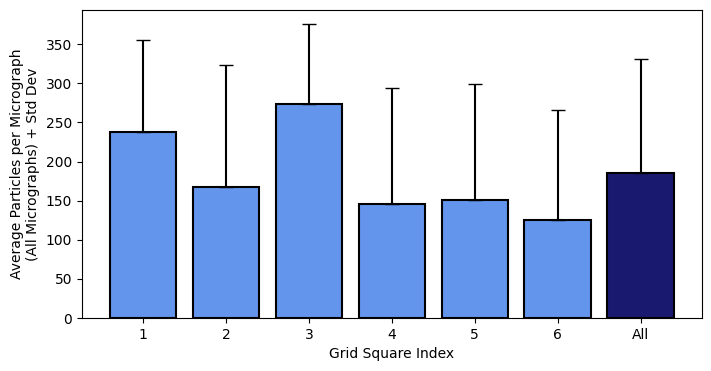

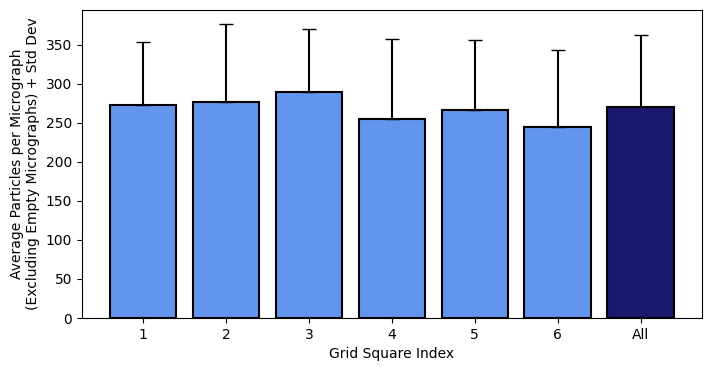

In [7]:
# Graphs for average paticles per micrograph
for include_empty, filename in [(True, "avg_particles_allmics.png"), (False, "avg_particles_noempty.png")]:
    unique_grids, averages, std_devs = calculate_avg_and_std(grid_square_indices, num_particles, include_empty)

    x_values = np.arange(len(unique_grids) + 1)
    x_labels = list(unique_grids) + ["All"]

    colors = ["cornflowerblue"] * len(unique_grids) + ["midnightblue"]

    yerr_positive = np.array([np.zeros_like(std_devs), std_devs])

    plt.figure(figsize=(8, 4))
    plt.bar(x_values, averages, yerr=yerr_positive, color=colors, capsize=5, edgecolor="black", linewidth=1.5)
    plt.xticks(x_values, x_labels)
    plt.xlabel("Grid Square Index")
    plt.ylabel("Average Particles per Micrograph" + ("\n(All Micrographs) + Std Dev" if include_empty else "\n(Excluding Empty Micrographs) + Std Dev"))
    plt.savefig(f"{output_dir}/{folder_name}/{filename}")

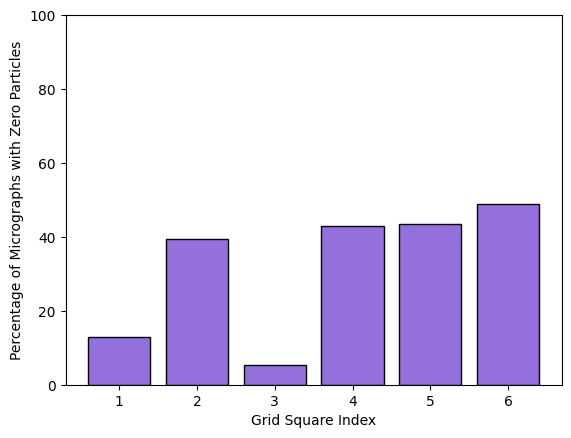

In [8]:
# Percentage of empty micrographs per grid square
unique_grids = np.unique(grid_square_indices)
percent_empty = []
for grid in unique_grids:
    particles_in_grid = num_particles[grid_square_indices == grid]
    percent_empty.append(100 * np.sum(particles_in_grid == 0) / len(particles_in_grid))

plt.bar(unique_grids, percent_empty, color="mediumpurple", edgecolor="black")
plt.xlabel("Grid Square Index")
plt.ylabel("Percentage of Micrographs with Zero Particles")
plt.ylim(0, 100)
plt.xticks(unique_grids)
plt.savefig(f"{output_dir}/{folder_name}/percent_empty.png")

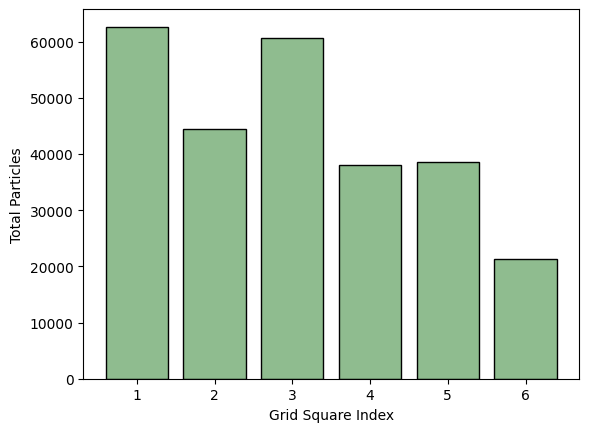

In [9]:
# Total sum of particles per grid square
total_particles = []
for grid in unique_grids:
    particles_in_grid = num_particles[grid_square_indices == grid]
    total_particles.append(np.sum(particles_in_grid))
    
plt.bar(unique_grids, total_particles, color="darkseagreen", edgecolor="black")
plt.xticks(unique_grids)
plt.xlabel("Grid Square Index")
plt.ylabel("Total Particles")
plt.savefig(f"{output_dir}/{folder_name}/total_particles.png")

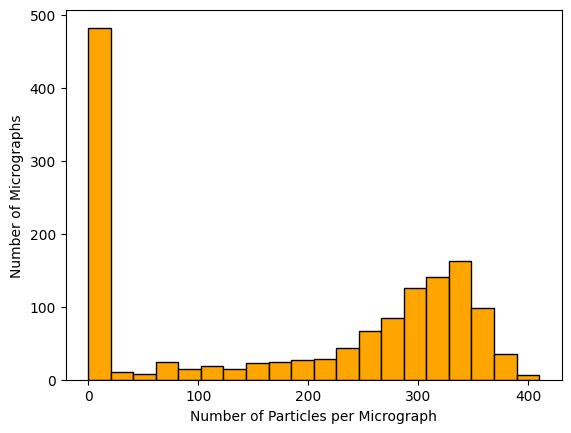

In [10]:
# Histogram of particles per micrograph

plt.hist(num_particles, bins=20, color="orange", edgecolor="black")
plt.xlabel("Number of Particles per Micrograph")
plt.ylabel("Number of Micrographs")
plt.savefig(f"{output_dir}/{folder_name}/distribution_particles_per_mic.png")

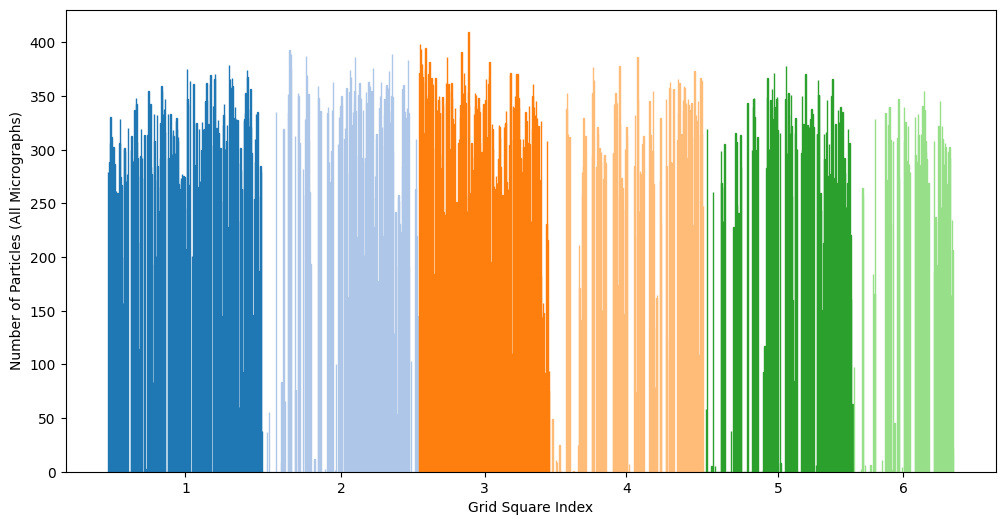

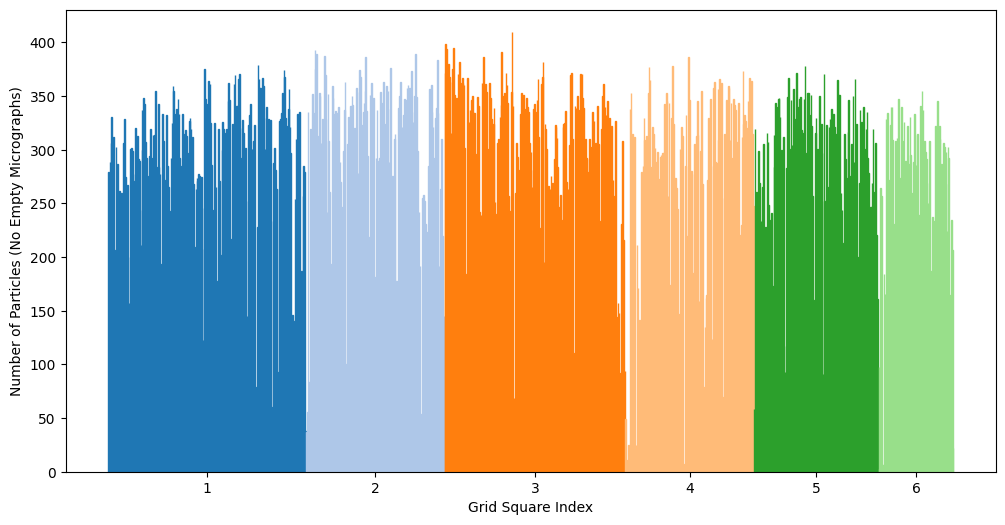

In [11]:
# Clustered bar graphs of particles per micrograph

tableau_colors = plt.cm.tab20.colors

for include_empty, filename in [(True, "particles_per_mic_allmics.png"), (False, "particles_per_mic_noempty.png")]:
    # Filter data based on whether empty micrographs are included
    filtered_data = data if include_empty else data[data[:, 4].astype(int) > 0]

    # Extract relevant columns
    grid_square_indices = filtered_data[:, 3].astype(int)
    num_particles_filtered = filtered_data[:, 4].astype(int)  # Use a distinct variable name to avoid conflicts

    # Create a color map for grid square indices
    unique_grids_clustered = np.unique(grid_square_indices)
    color_map = {grid: tableau_colors[i % len(tableau_colors)] for i, grid in enumerate(unique_grids_clustered)}

    # Map micrograph indices to a continuous range
    continuous_x = np.arange(len(filtered_data))  # Continuous x-axis for the bars

    # Plot the bars
    plt.figure(figsize=(12, 6))
    for x, grid_square_index, particles in zip(continuous_x, grid_square_indices, num_particles_filtered):
        plt.bar(x, particles, color=color_map[grid_square_index], edgecolor=color_map[grid_square_index])

    # Set x-axis labels to represent grid square indices
    # Group micrograph indices by grid square index for labeling
    grid_square_labels = []
    for grid in unique_grids_clustered:
        # Find the range of continuous x values for this grid square
        indices_in_grid = continuous_x[grid_square_indices == grid]
        if len(indices_in_grid) > 0:
            mid_index = (indices_in_grid[0] + indices_in_grid[-1]) / 2  # Use the midpoint of indices for the label
            grid_square_labels.append((mid_index, grid))

    # Apply labels to the x-axis
    label_positions, label_values = zip(*grid_square_labels)
    plt.xticks(label_positions, label_values)

    # Add labels and title
    plt.xlabel("Grid Square Index")
    plt.ylabel("Number of Particles" + (" (All Micrographs)" if include_empty else " (No Empty Micrographs)"))

    # Save the graph
    plt.savefig(f"{output_dir}/{folder_name}/{filename}")

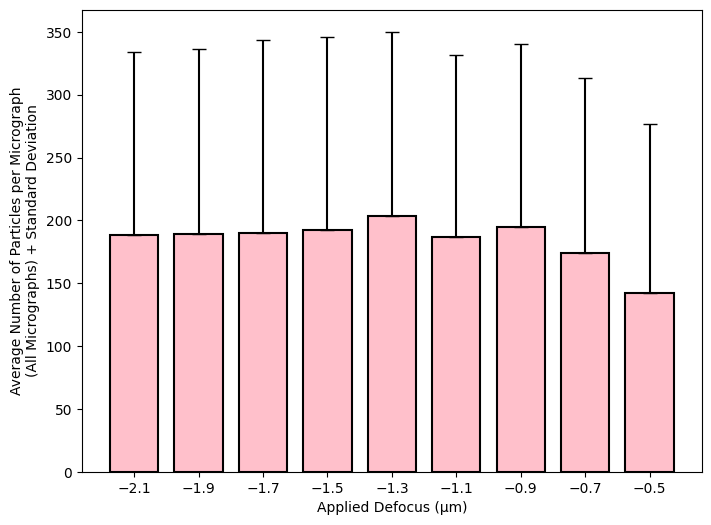

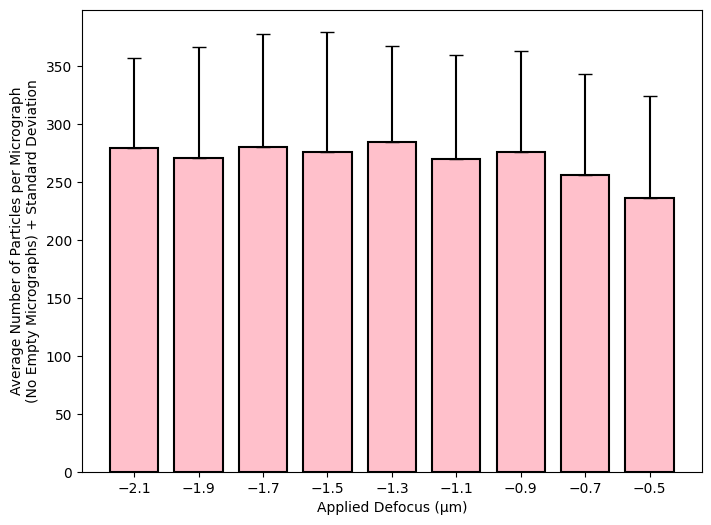

In [12]:
# Applied Defocus vs. Average Number of Particles

for include_empty, filename in [(True, "particles_vs_defocus_allmics.png"), (False, "particles_vs_defocus_noempty.png")]:

    filtered_data = data if include_empty else data[data[:, 4].astype(int) > 0]

    applied_defocus = filtered_data[:, 6].astype(float)  # Column 6: AppliedDefocus
    num_particles = filtered_data[:, 4].astype(float)   # Column 4: Number of Particles

    # Group by unique AppliedDefocus values
    unique_defocus = np.unique(applied_defocus)
    avg_particles = []
    std_particles = []

    for defocus in unique_defocus:
        particles_in_group = num_particles[applied_defocus == defocus]
        avg_particles.append(np.mean(particles_in_group))
        std_particles.append(np.std(particles_in_group))

    yerr_positive = np.array([np.zeros_like(std_particles), std_particles])

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(unique_defocus, avg_particles, yerr=yerr_positive, capsize=5, color="pink", edgecolor="black", width=0.15, linewidth=1.5)
    plt.xticks(unique_defocus)
    plt.xlabel("Applied Defocus (µm)")
    plt.ylabel("Average Number of Particles per Micrograph\n" + ("(All Micrographs)" if include_empty else "(No Empty Micrographs)") + " + Standard Deviation")
    plt.savefig(f"{output_dir}/{folder_name}/{filename}")

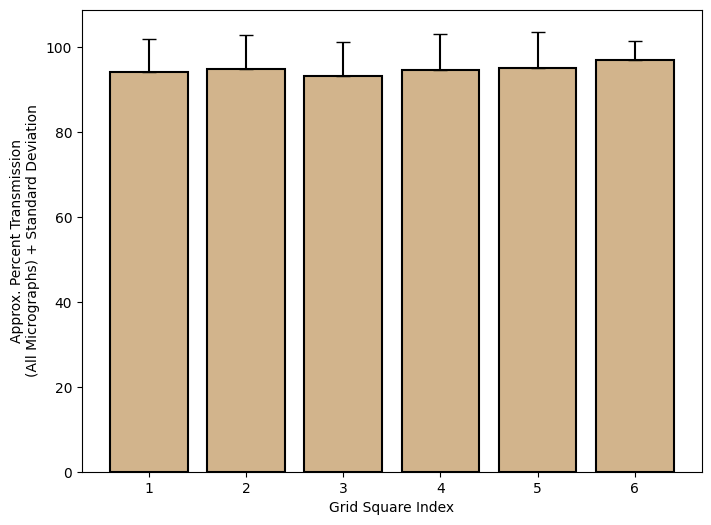

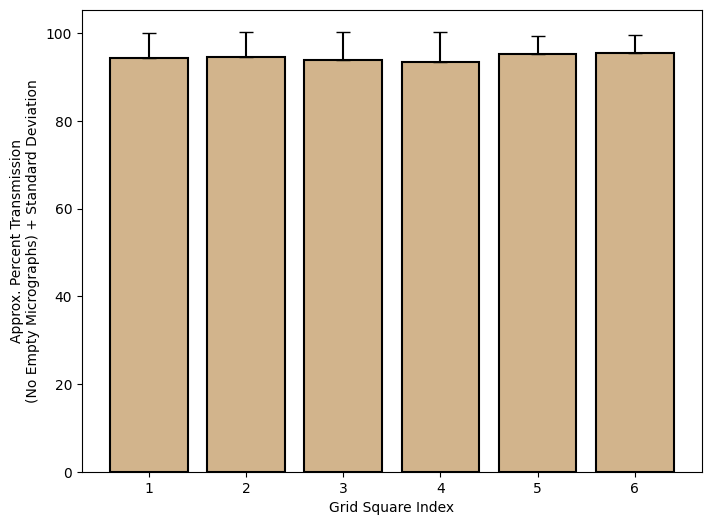

In [20]:
# Bar Graph of Average Percent Transmission for Each Grid Square

for include_empty, filename in [(True, "transmission_vs_gridsquare_allmics.png"), (False, "transmission_vs_gridsquare_noempty.png")]:

    filtered_data = data if include_empty else data[data[:, 4].astype(int) > 0]

    transmission = filtered_data[:, 5].astype(float)  # Column 5: Transmission (approx.)
    grid_square_index = filtered_data[:, 3].astype(int)  # Column 3: GridSquareIndex

    # Group by unique AppliedDefocus values
    unique_gridsquare = np.unique(grid_square_index)
    avg_trans = []
    std_trans = []

    for index_step in unique_gridsquare:
        group_transmission = transmission[grid_square_index == index_step]
        avg_trans.append(np.mean(group_transmission))
        std_trans.append(np.std(group_transmission))

    yerr_positive = np.array([np.zeros_like(std_trans), std_trans])

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(unique_gridsquare, avg_trans, yerr=yerr_positive, capsize=5, color="tan", edgecolor="black", linewidth=1.5)
    plt.xticks(unique_gridsquare)
    plt.xlabel("Grid Square Index")
    plt.ylabel("Approx. Percent Transmission\n" + ("(All Micrographs)" if include_empty else "(No Empty Micrographs)") + " + Standard Deviation")
    plt.savefig(f"{output_dir}/{folder_name}/{filename}")

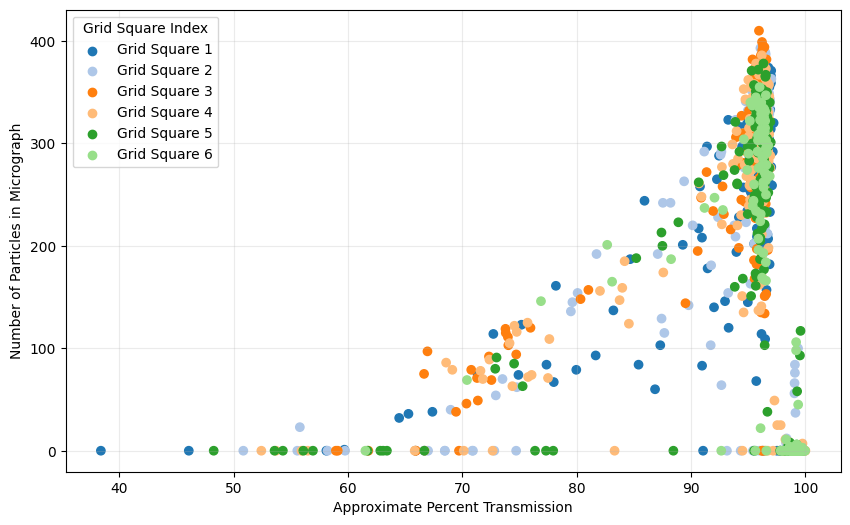

In [15]:
# Scatterplot of Percent Transmission vs. Number of Particles in Micrograph

transmission = data[:, 5].astype(float)  # Column 5: Transmission (approx.)
num_particles = data[:, 4].astype(float)   # Column 4: Number of Particles
grid_square_index = data[:, 3].astype(int)  # Column 3: GridSquareIndex

gridsquare_colors = [color_map[entry] for entry in grid_square_index]

# Create a scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(transmission, num_particles, c=gridsquare_colors, edgecolor=None)
plt.xlabel("Approximate Percent Transmission")
plt.ylabel("Number of Particles in Micrograph")
plt.grid(alpha=0.25)

# Add a legend for the grid square indices
unique_grids = np.unique(grid_square_index)
for grid in unique_grids:
    plt.scatter([], [], color=color_map[grid], label=f"Grid Square {grid}")
plt.legend(title="Grid Square Index", loc="upper left")

plt.savefig(f"{output_dir}/{folder_name}/particles_vs_transmission.png")

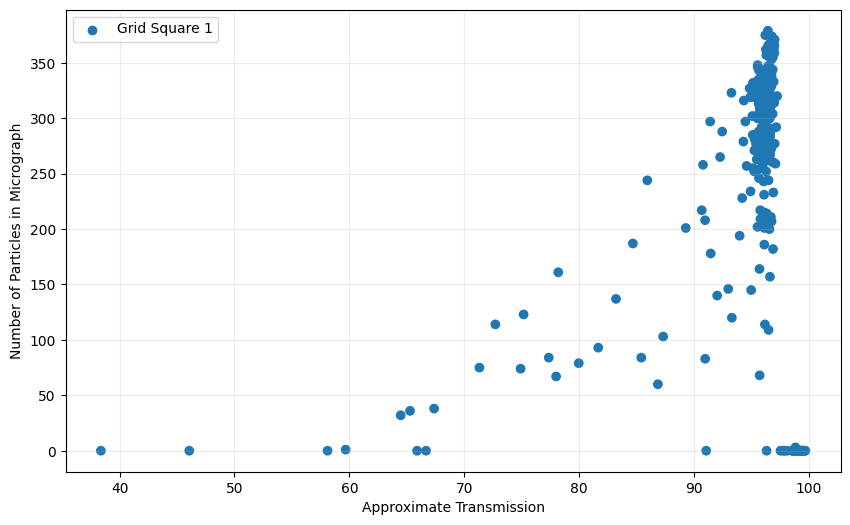

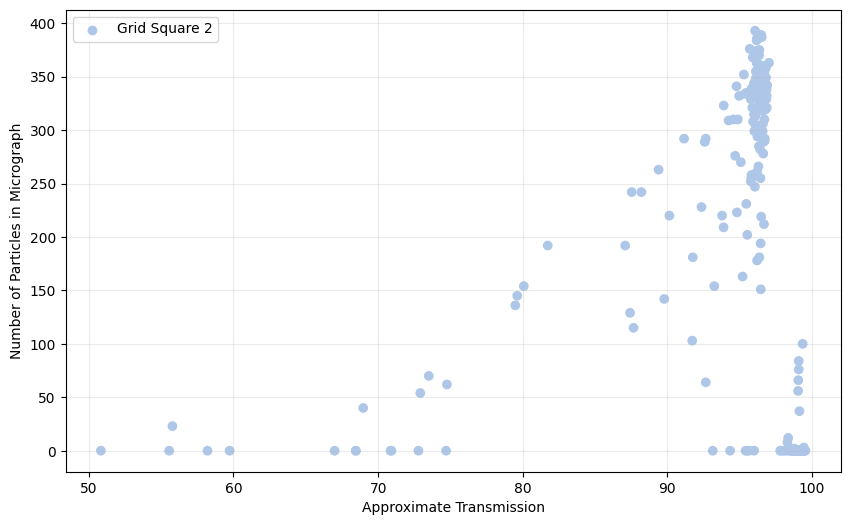

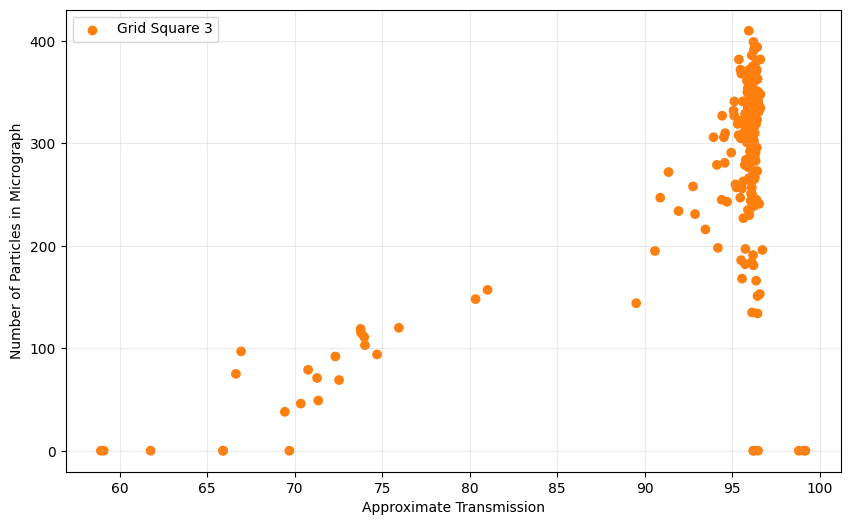

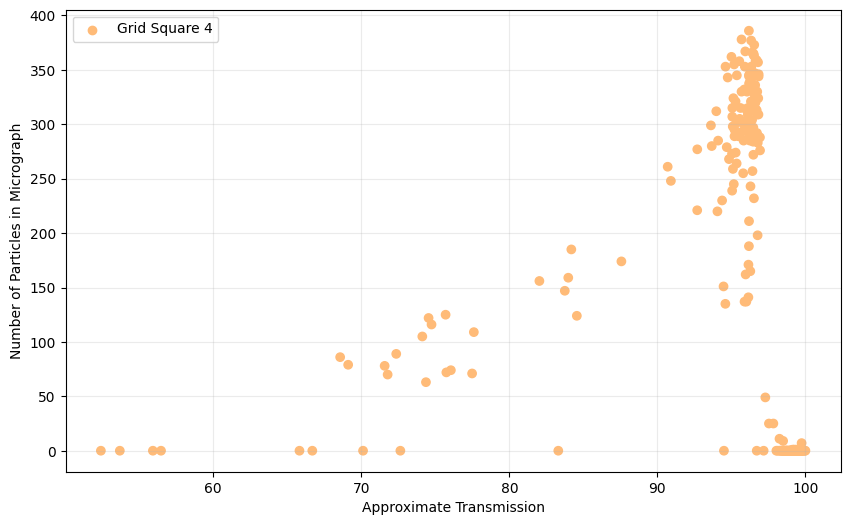

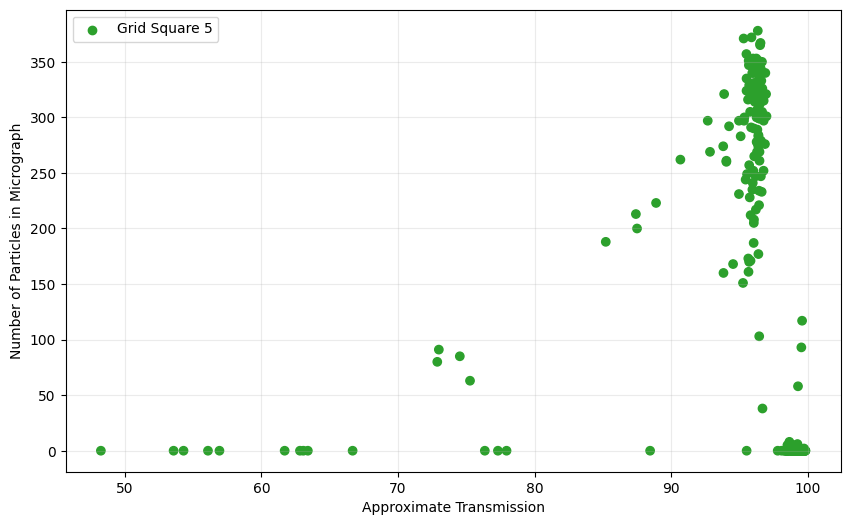

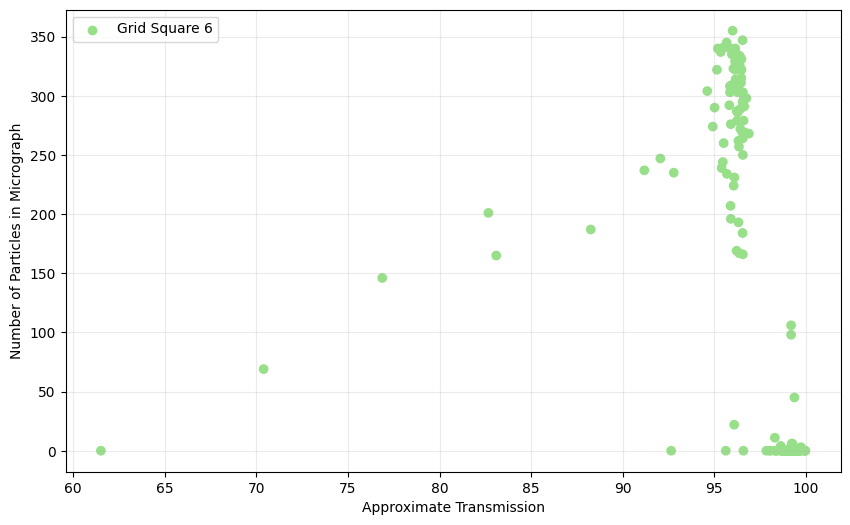

In [16]:
# Scatterplot of Transmission vs. Number of Particles in Micrograph

grid_square_index = data[:, 3].astype(int)  # Column 3: GridSquareIndex
unique_grid_squares = np.unique(grid_square_index)

for grid in unique_grid_squares:
    
    # Create a scatterplot
    gridsq_data = data[data[:, 3].astype(int) == grid]
    transmission = gridsq_data[:, 5].astype(float)  # Column 5: DoseOnCamera
    num_particles = gridsq_data[:, 4].astype(float)   # Column 4: Number of Particles
    grid_square_index = gridsq_data[:, 3].astype(int)  # Column 3: GridSquareIndex
    gridsquare_colors = [color_map[entry] for entry in grid_square_index]
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transmission, num_particles, c=gridsquare_colors, edgecolor=None)
    plt.xlabel("Approximate Transmission")
    plt.ylabel("Number of Particles in Micrograph")
    plt.grid(alpha=0.25)

    plt.scatter([], [], color=color_map[grid], label=f"Grid Square {grid}")
    plt.legend(loc="upper left")

    plt.savefig(f"{output_dir}/{folder_name}/particles_vs_transmission_gridsquares/particles_vs_transmission_sq{grid}.png")

In [ ]:
matplotlib.pyplot.close()